In [2]:
import pandas as pd
import numpy as np 
from statistics import mode
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy as stats 
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))
plt.style.use('ggplot')

In [3]:
df = pd.read_csv('clinvar_conflicting.csv')

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (0,38,40) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,CHROM,POS,REF,ALT,AF_ESP,AF_EXAC,AF_TGP,CLNDISDB,CLNDISDBINCL,CLNDN,...,SIFT,PolyPhen,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,LoFtool,CADD_PHRED,CADD_RAW,BLOSUM62
0,1,955563,G,C,0.0000,0.00000,0.0000,"MedGen:C3808739,OMIM:615120|MedGen:CN169374",NaN,"Myasthenic_syndrome,_congenital,_8|not_specified",...,NaN,NaN,NaN,NaN,NaN,NaN,0.421,11.390,1.133255,-2.0
1,1,955597,G,T,0.0000,0.42418,0.2826,MedGen:CN169374,NaN,not_specified,...,NaN,NaN,NaN,NaN,NaN,NaN,0.421,8.150,0.599088,NaN
2,1,955619,G,C,0.0000,0.03475,0.0088,"MedGen:C3808739,OMIM:615120|MedGen:CN169374",NaN,"Myasthenic_syndrome,_congenital,_8|not_specified",...,NaN,NaN,NaN,NaN,NaN,NaN,0.421,3.288,0.069819,1.0
3,1,957640,C,T,0.0318,0.02016,0.0328,"MedGen:C3808739,OMIM:615120|MedGen:CN169374",NaN,"Myasthenic_syndrome,_congenital,_8|not_specified",...,NaN,NaN,NaN,NaN,NaN,NaN,0.421,12.560,1.356499,NaN
4,1,976059,C,T,0.0000,0.00022,0.0010,MedGen:CN169374,NaN,not_specified,...,NaN,NaN,NaN,NaN,NaN,NaN,0.421,17.740,2.234711,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 46 columns):
CHROM                 65188 non-null object
POS                   65188 non-null int64
REF                   65188 non-null object
ALT                   65188 non-null object
AF_ESP                65188 non-null float64
AF_EXAC               65188 non-null float64
AF_TGP                65188 non-null float64
CLNDISDB              65188 non-null object
CLNDISDBINCL          76 non-null object
CLNDN                 65188 non-null object
CLNDNINCL             76 non-null object
CLNHGVS               65188 non-null object
CLNSIGINCL            76 non-null object
CLNVC                 65188 non-null object
CLNVI                 27659 non-null object
MC                    58219 non-null object
ORIGIN                59065 non-null float64
SSR                   104 non-null float64
CLASS                 65188 non-null int64
Allele                65188 non-null object
Consequence        

### Results from SIFT and POLYPHEN software that predicts the severity of a variant, in-silico.

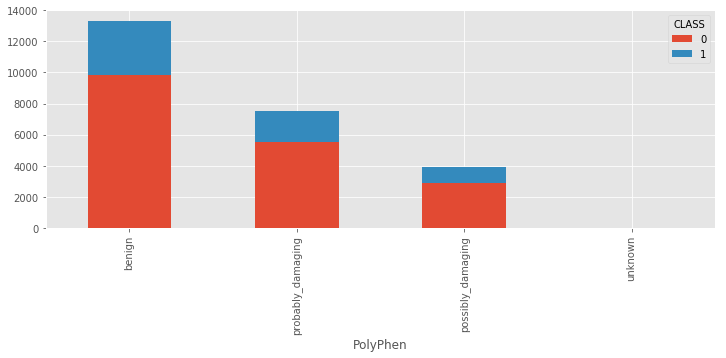

In [10]:
pp_ct = pd.crosstab(df.PolyPhen , df.CLASS , margins= True)
pp_ct.drop('All' , axis = 0 , inplace = True)

pp_ct = pp_ct.sort_values(by = 'All' , ascending = False)
pp_ct.drop('All' , axis = 1 , inplace = True )

_ = pp_ct.plot.bar (figsize = (12,4) , stacked = True)

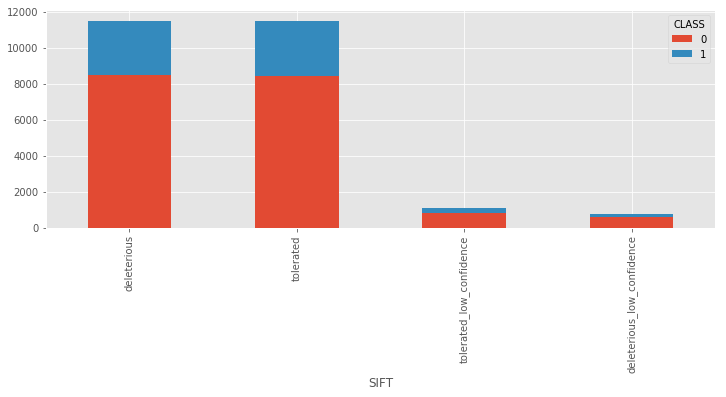

In [11]:
sift_ct = pd.crosstab(df.SIFT, df.CLASS, margins=True)
sift_ct.drop('All', axis=0, inplace=True)

# limit to the 50 most submitted genes for visualization
sift_ct = sift_ct.sort_values(by='All', ascending=False)
sift_ct.drop('All', axis=1, inplace=True)

sift_ct.plot.bar(stacked=True, figsize=(12, 4));

### The dark blue box in in the heatmap highlights the negatvie correlation with the allele frequency features. Common alleles are less likely to pathogenic (cause disease), therefore most labs agree they should be benign.



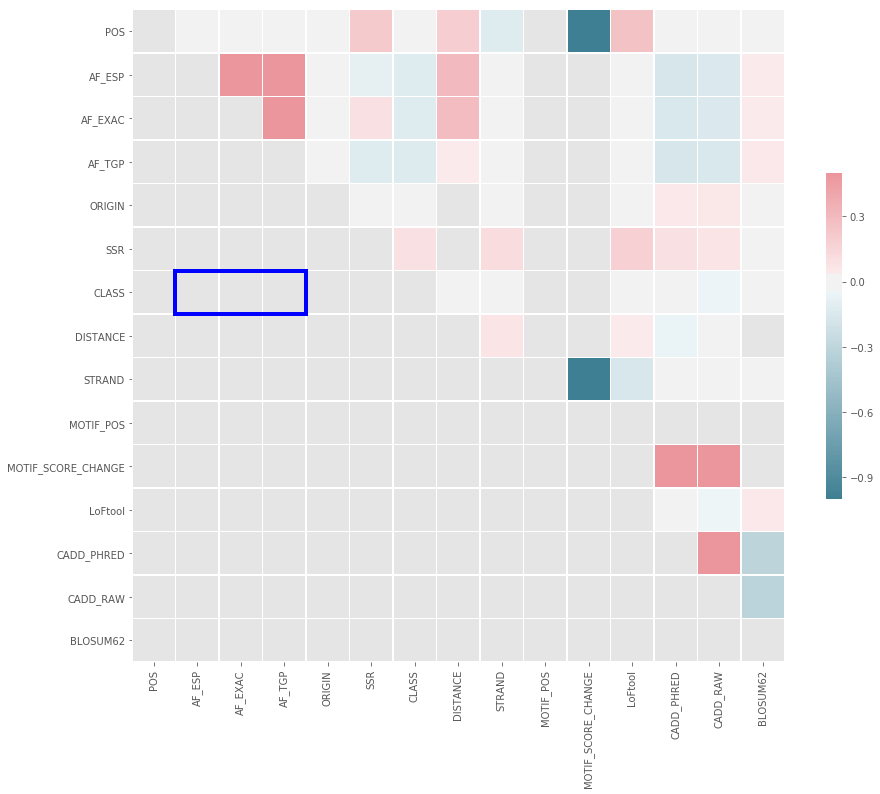

In [41]:
num = df.select_dtypes(exclude='object').corr()

mask = np.zeros_like(num, dtype=np.bool)

mask[np.tril_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 12))

cmap = sns.diverging_palette(220 , 10 , as_cmap= True)

g = sns.heatmap(num, mask = mask , cmap = cmap , vmax = 0.5 , center=0 , 
               square= True , linewidths= .5 , cbar_kws= {'shrink': 0.5})

from matplotlib.patches import Rectangle
_ = g.add_patch(Rectangle((1, 6), 3, 1, fill=False, edgecolor='blue', lw=4))

### most AF values are very low

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


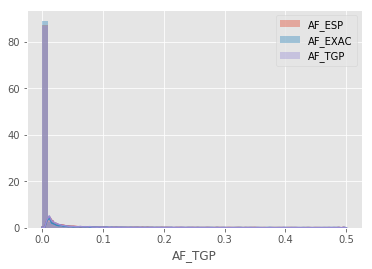

In [42]:
sns.distplot(df.AF_ESP , label = 'AF_ESP')
sns.distplot(df.AF_EXAC, label="AF_EXAC")
sns.distplot(df.AF_TGP, label="AF_TGP")
plt.legend();

### CLNDN are lists of diseases associated with the variant. It may be beneficial to treat both not_specified and/or not_provided as the same category.

In [58]:
clndn = pd.concat([df.CLASS.loc[(df.CLNDN == 'not_specified')|(df.CLNDN == 'not_provided')| 
                                (df.CLNDN=='not_specified|not_provided')].value_counts().rename('disease_not_specified')
                    , df.CLASS.loc[~((df.CLNDN == 'not_specified')|(df.CLNDN == 'not_provided')| 
                                     (df.CLNDN=='not_specified|not_provided'))].value_counts().rename('some_disease_specified')], axis = 1).T


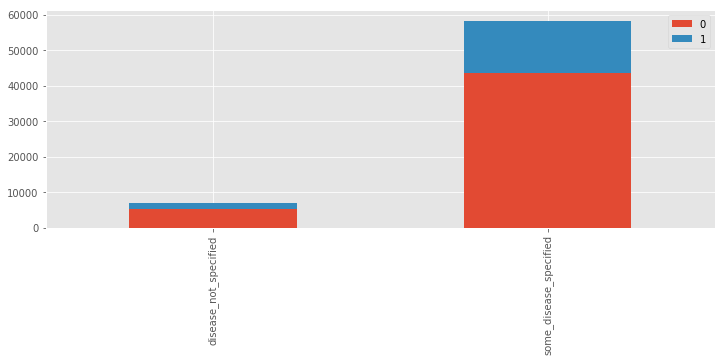

In [59]:
_ = clndn.plot.bar(stacked = True, figsize = (12, 4))

#### Exons are features of genes that map sequences nucleotides that encode functional parts of DNA. Genes have differing numbers of exons, some have few, some have many. Let's see if, regardless of gene, whether or not conflicting variants are enriched in a general exon location.

In [5]:
import re

df.EXON.fillna('0', inplace=True)
df['variant_exon'] = df.EXON.apply(lambda x: [int(s) for s in re.findall(r'\b\d+\b', x)][0])

#### variant_exon = 0 represents that the variant is located in an Intron. Intron variants seem to be conflicting much more frequently than exon variants.

(-0.5, 20.5)

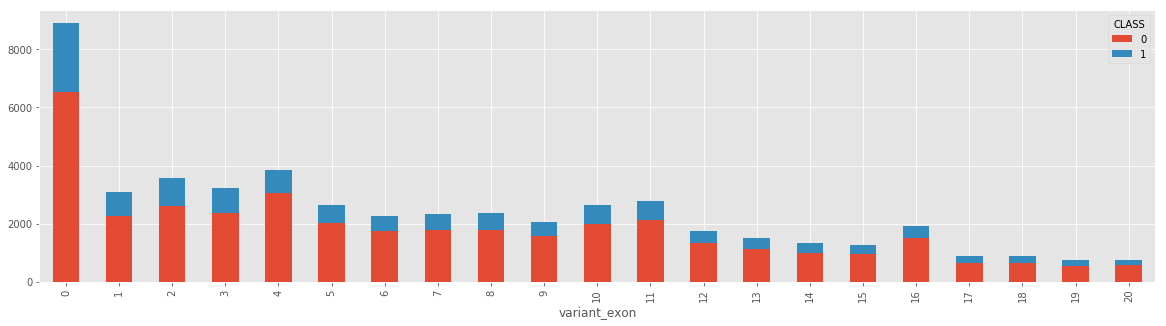

In [6]:
exondf = pd.crosstab(df['variant_exon'], df['CLASS'])
exondf.plot.bar(stacked=True, figsize=(20, 5))
plt.xlim(-0.5, 20.5)

#### SNVs are more likely to be conflicting than Indels

In [8]:
snvs = df.loc[(df.REF.str.len()==1) & (df.ALT.str.len()==1)]
indels = df.loc[(df.REF.str.len()>1) | (df.ALT.str.len()>1)]

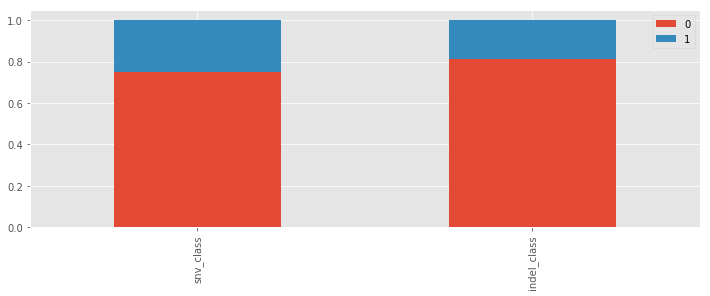

In [10]:
snp_indel = pd.concat([df.CLASS.value_counts(normalize=True).rename('snv_class'), 
                       indels.CLASS.value_counts(normalize=True).rename('indel_class')], 
                      axis=1).T
_ = snp_indel.plot.bar(stacked=True, figsize=(12, 4))

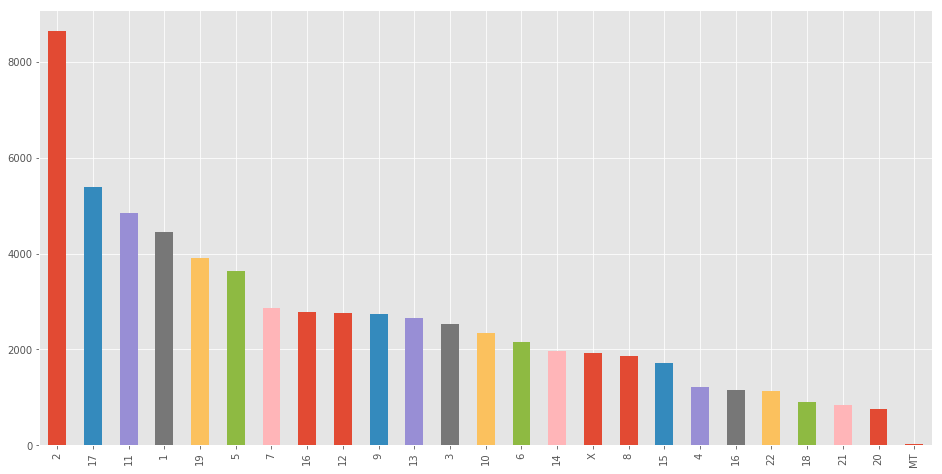

In [60]:

plt.figure(figsize=(16,8))
_ = df.CHROM.value_counts().plot(kind = 'bar')

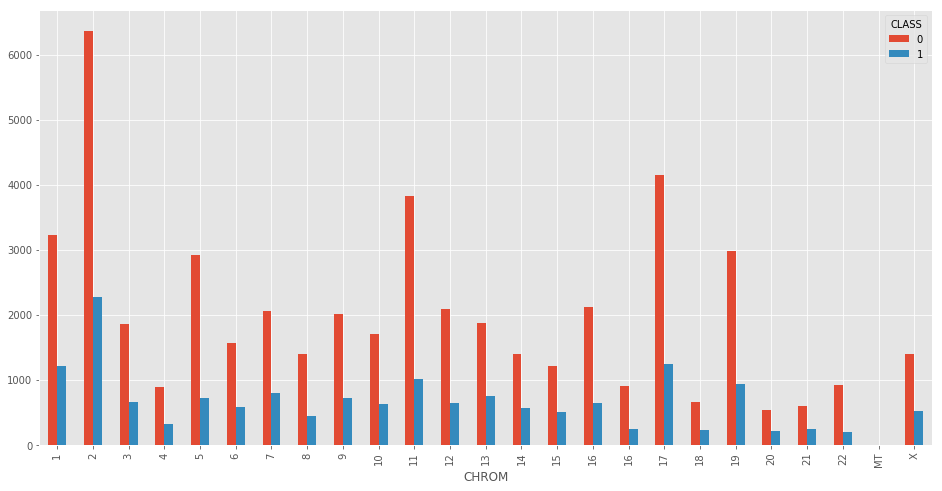

In [61]:
_ = pd.pivot_table(df, index= 'CHROM' , columns='CLASS', values='STRAND', aggfunc= 'count').plot(kind = 'bar' , figsize = (16,8))

#### CLNVC (Variant Type)

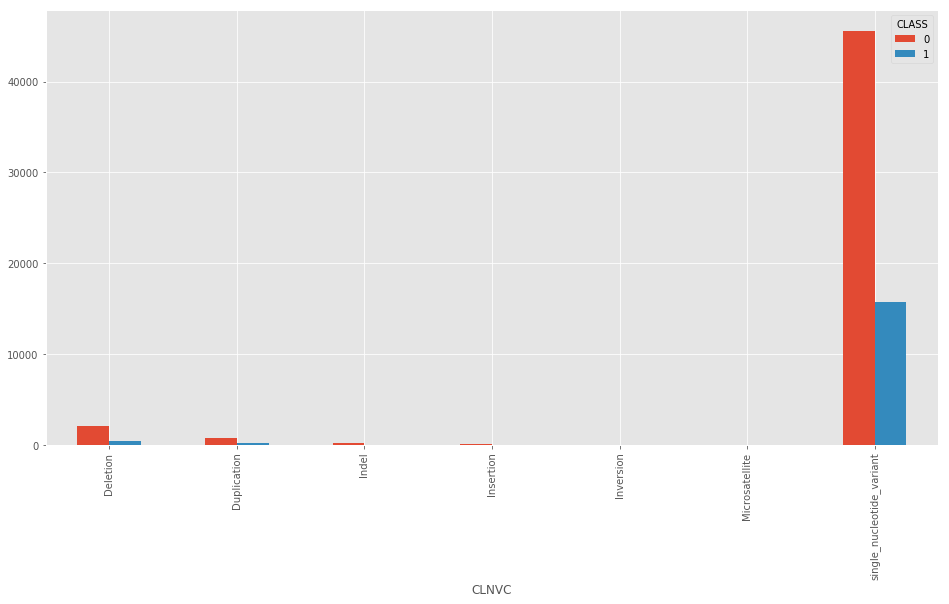

In [62]:
_= pd.pivot_table(df, index= 'CLNVC' ,columns='CLASS', values='STRAND' , aggfunc='count' ).plot(kind = 'bar' , figsize = (16 , 8))

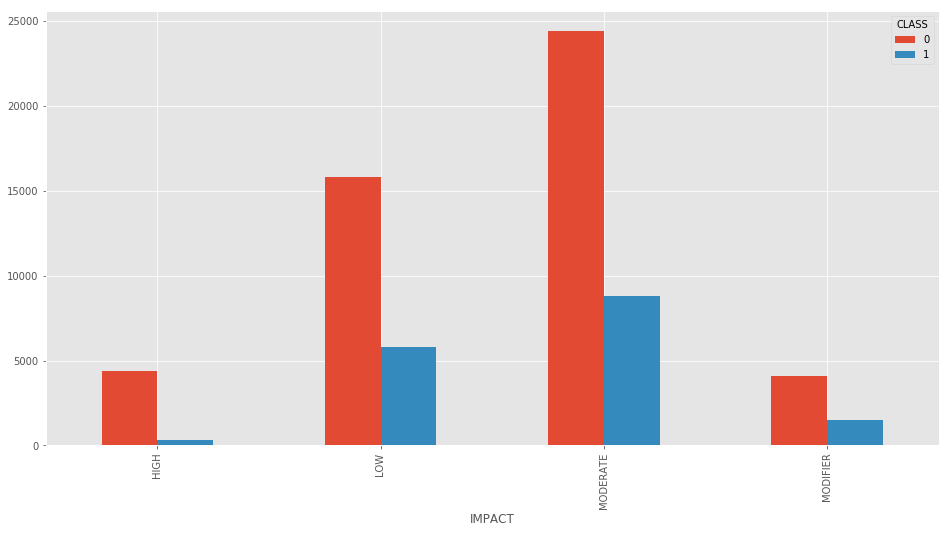

In [63]:
_ = pd.pivot_table(df, index= 'IMPACT' ,columns='CLASS', values='SYMBOL' , aggfunc='count').plot(kind = 'bar' , figsize = (16 , 8))

/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


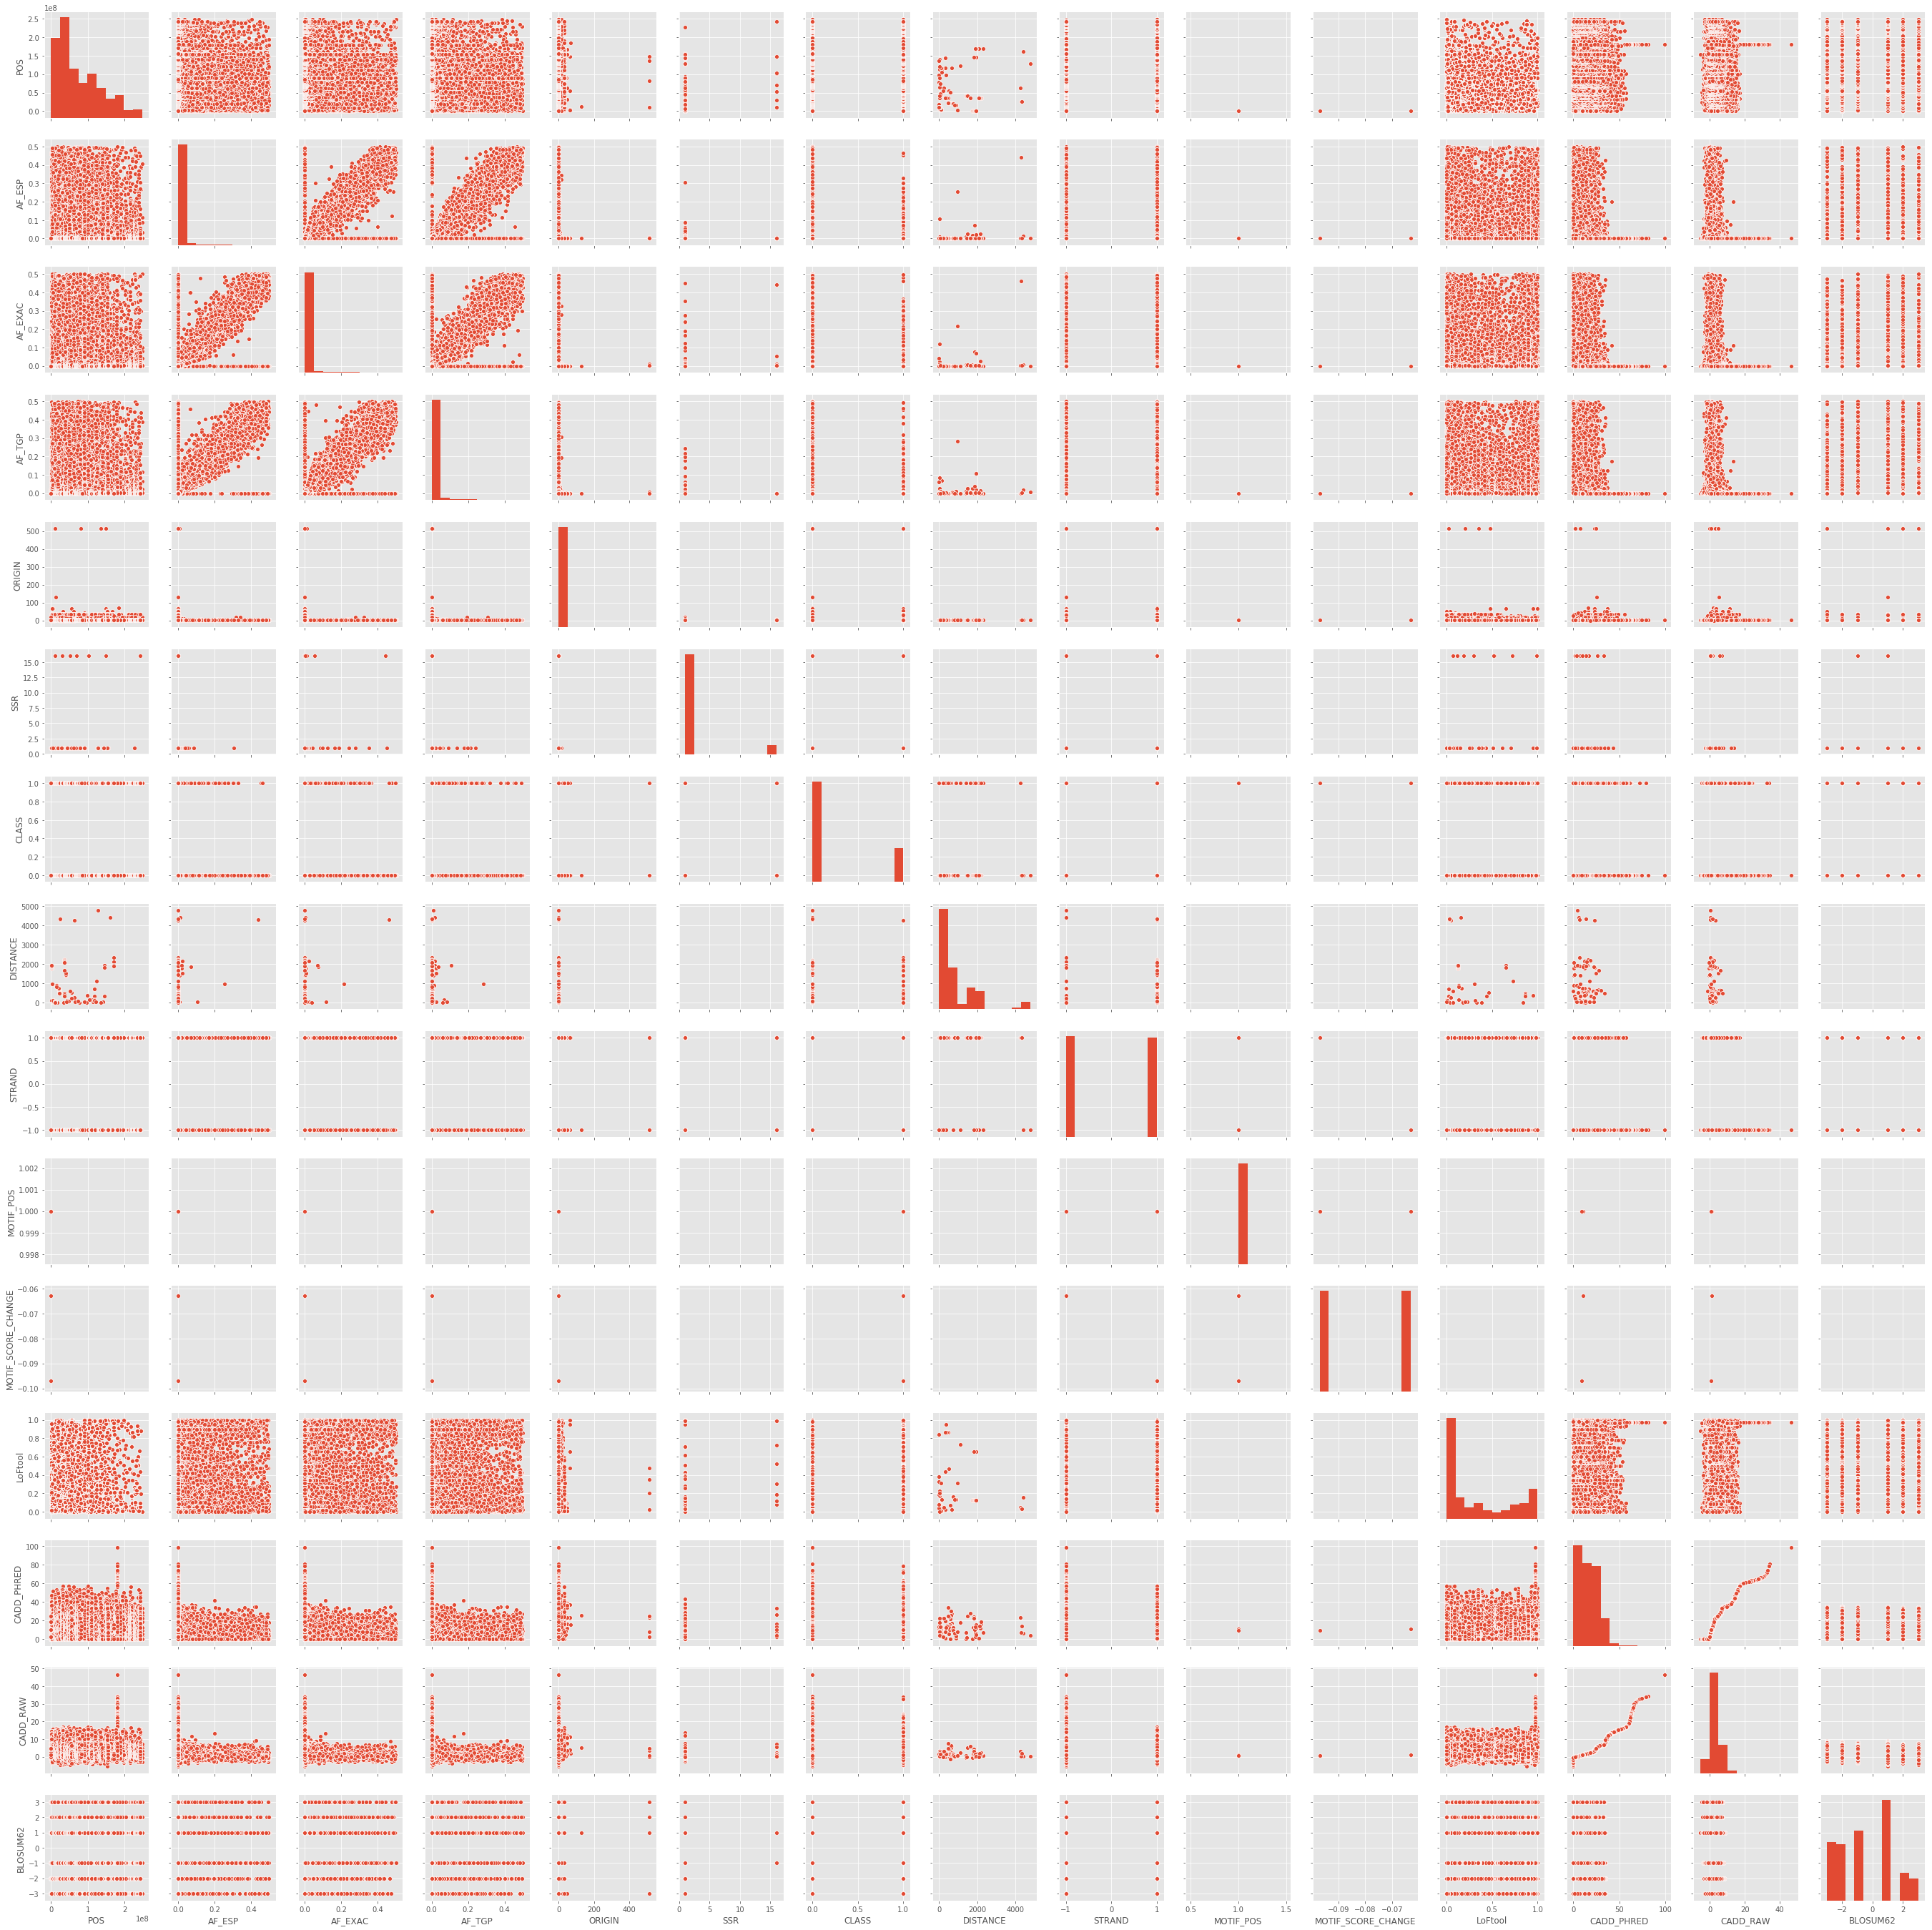

In [65]:
sns.pairplot(df)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


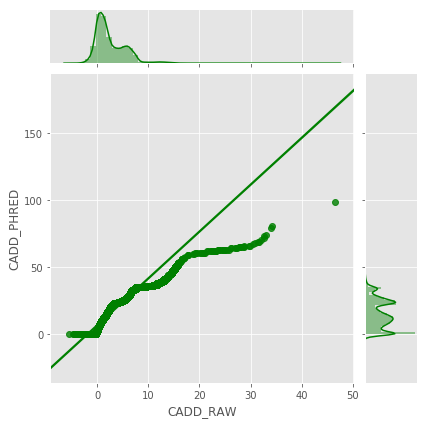

In [64]:
_ = sns.jointplot('CADD_RAW' , 'CADD_PHRED' , data = df , kind = 'reg' , color = 'green')